In [116]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [117]:
#track_record = pd.read_csv('experiments/all_series_final_solution.csv')
#track_record = pd.read_csv('experiments/just_game_id.csv')
track_record = pd.read_csv('artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231201163246/result.csv')
#track_record = pd.read_csv('artefacts/aggregatorGameId_min_games0_do_baselineTrue_20231201230422/result.csv')
track_record.head(20)

,0,1,2,3,4,5,6
0,2738735,0.499213,5,2019-04-27,False,True,2019-04-27
1,2738739,0.000000,5,2019-04-27,False,True,2019-04-27
2,2738740,0.181945,5,2019-04-27,False,True,2019-04-27
3,2740885,0.028737,5,2019-04-28,False,True,2019-04-28
4,2740906,0.058760,5,2019-04-28,False,True,2019-04-28
5,2740886,0.753552,5,2019-04-28,False,True,2019-04-28
6,2740905,0.049525,5,2019-04-28,False,True,2019-04-28
7,2740882,0.074892,5,2019-04-28,False,True,2019-04-28
8,2740879,0.132063,4,2019-04-28,False,True,2019-04-28
9,2740887,0.040878,5,2019-04-28,False,True,2019-04-28


In [118]:
track_record.columns = ['GameId',	'return',	'n_bets',	'aggregator',	'time_limit_flag', 'is_valid_solution', 'Datetime']
track_record

,GameId,return,n_bets,aggregator,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.499213,5,2019-04-27,False,True,2019-04-27
1,2738739,0.000000,5,2019-04-27,False,True,2019-04-27
2,2738740,0.181945,5,2019-04-27,False,True,2019-04-27
3,2740885,0.028737,5,2019-04-28,False,True,2019-04-28
4,2740906,0.058760,5,2019-04-28,False,True,2019-04-28
...,...,...,...,...,...,...,...
332,3017440,0.000000,5,2019-12-05,False,True,2019-12-05
333,3017442,0.382032,5,2019-12-05,False,True,2019-12-05
334,3017438,0.237776,5,2019-12-05,False,True,2019-12-05
335,3017439,0.109158,4,2019-12-05,False,True,2019-12-05


In [38]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record[track_record.is_valid_solution].shape)


(119, 7)
(119, 7)


In [24]:
track_record.head(20)

,GameId,return,n_bets,aggregator,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.00,1,2738735,False,True,2019-04-27
1,2738739,0.00,1,2738739,False,True,2019-04-27
2,2738740,1.60,1,2738740,False,True,2019-04-27
3,2740879,0.00,1,2740879,False,True,2019-04-28
4,2740882,2.66,1,2740882,False,True,2019-04-28
5,2740885,9.50,1,2740885,False,True,2019-04-28
6,2740886,0.00,1,2740886,False,True,2019-04-28
7,2740887,0.00,1,2740887,False,True,2019-04-28
8,2740905,0.00,1,2740905,False,True,2019-04-28
9,2740906,0.00,1,2740906,False,True,2019-04-28


In [6]:
def process_results(track_record, aggregator):
    
    count_col = track_record.groupby(aggregator, sort=False).size().reset_index(drop=True)
    #is_valid_solution = track_record.groupby(aggregator, sort=False)['is_valid_solution'].any().reset_index(drop=True)
    track_record = track_record.groupby('Datetime', sort=False)[['return', 'n_bets']].sum().reset_index()
    track_record['count'] = count_col
    #track_record['is_valid_solution'] = is_valid_solution

    return track_record

In [39]:
#track_record = process_results(track_record, 'Datetime')
track_record

,GameId,return,n_bets,aggregator,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.0,1,2738735,False,True,2019-04-27
1,2738739,0.0,1,2738739,False,True,2019-04-27
2,2738740,0.0,1,2738740,False,True,2019-04-27
3,2740879,2.6,1,2740879,False,True,2019-04-28
4,2740882,0.0,1,2740882,False,True,2019-04-28
...,...,...,...,...,...,...,...
114,2841132,0.0,1,2841132,False,True,2019-07-28
115,2841133,0.0,1,2841133,False,True,2019-07-28
116,2841135,0.0,1,2841135,False,True,2019-07-28
117,2841136,0.0,1,2841136,False,True,2019-07-28


In [8]:
# count_col = track_record.groupby(['Datetime']).count().reset_index()['GameId']
# is_valid_solution = track_record.groupby(['Datetime']).any().reset_index()['is_valid_solution']
# track_record = track_record.groupby(['Datetime'])[['return', 'n_bets']].sum().reset_index()
# track_record['count'] = count_col
# track_record['is_valid_solution'] = is_valid_solution
# track_record

In [9]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

KeyError: 'count'

In [ ]:
track_record.groupby(track_record.Datetime.apply(lambda x: x[:4])).count()

,Datetime,return,n_bets,count
Datetime,,,,
2019,44,44,44,44


In [ ]:
track_record.groupby(['count', 'return']).size()

count  return
1      0.000     27
       1.600      1
       1.875      1
       2.480      1
       2.750      1
       3.740      1
       4.200      1
       4.270      1
       5.380      1
       7.190      1
       9.500      1
       11.875     1
       12.160     1
       12.890     1
       13.200     1
       15.740     1
       26.500     1
       28.000     1
dtype: int64

In [ ]:
track_record.groupby('count')['return'].median()

count
1    0.0
Name: return, dtype: float64

In [40]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record.shape)

(119, 7)
(119, 7)


In [ ]:
track_record.head()

,GameId,return,n_bets,aggregator,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.00,1,2738735,False,True,2019-04-27
1,2738739,0.00,1,2738739,False,True,2019-04-27
2,2738740,1.60,1,2738740,False,True,2019-04-27
3,2740879,0.00,1,2740879,False,True,2019-04-28
4,2740882,2.66,1,2740882,False,True,2019-04-28


In [41]:
def compute_stake(df):
    stake = [1]
    current_stake = 1
    percentage = 0.10
    for i in df['return']:

        preserved_stake = current_stake * (1-percentage)
        bet_stake = current_stake*percentage
        current_stake = preserved_stake + bet_stake*i

        #print(current_stake)

        stake.append(current_stake)
    
    return stake

In [42]:
track_record.head()

,GameId,return,n_bets,aggregator,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.0,1,2738735,False,True,2019-04-27
1,2738739,0.0,1,2738739,False,True,2019-04-27
2,2738740,0.0,1,2738740,False,True,2019-04-27
3,2740879,2.6,1,2740879,False,True,2019-04-28
4,2740882,0.0,1,2740882,False,True,2019-04-28


In [43]:
stake = compute_stake(track_record)
stake

[1,
 0.9,
 0.81,
 0.7290000000000001,
 0.8456400000000002,
 0.7610760000000002,
 0.8759984760000001,
 1.9271966472000004,
 2.5053556413600004,
 2.2548200772240006,
 2.0293380695016006,
 1.8264042625514405,
 1.6437638362962965,
 1.4793874526666668,
 1.3314487074,
 1.19830383666,
 1.078473452994,
 1.2402444709431002,
 1.1162200238487903,
 1.0045980214639112,
 2.2101156472206047,
 1.9891040824985442,
 1.79019367424869,
 1.611174306823821,
 1.4500568761414387,
 1.3050511885272948,
 1.1745460696745653,
 1.0570914627071089,
 0.951382316436398,
 3.044423412596474,
 2.7399810713368264,
 2.465982964203144,
 2.2193846677828297,
 1.9974462010045468,
 1.7977015809040922,
 2.6066672923109335,
 2.34600056307984,
 2.111400506771856,
 2.298892871773197,
 2.0690035845958774,
 1.8621032261362898,
 1.6758929035226608,
 1.5083036131703949,
 2.036209877780033,
 1.8325888900020297,
 1.6493300010018268,
 2.391528501452649,
 2.5995914810790297,
 2.3396323329711266,
 2.105669099674014,
 1.8951021897066127,
 1.

In [44]:
track_record['Datetime'] = track_record.apply(lambda x: f"{x['Datetime']}_{x['GameId']}", axis=1)

In [45]:
def build_plot_df(df, stake):
    return pd.DataFrame({'date': ['0'] + list(df.Datetime),
                        'return': [0] + list(df['return']),
                        #'count': [0] + list(df['count']),
                        #'n_bets': [0] + list(df.n_bets),
                        'stake':stake})
my_df = build_plot_df(track_record, stake)
my_df

,date,return,stake
0,0,0.0,1.000000
1,2019-04-27_2738735,0.0,0.900000
2,2019-04-27_2738739,0.0,0.810000
3,2019-04-27_2738740,0.0,0.729000
4,2019-04-28_2740879,2.6,0.845640
...,...,...,...
115,2019-07-28_2841132,0.0,0.059778
116,2019-07-28_2841133,0.0,0.053800
117,2019-07-28_2841135,0.0,0.048420
118,2019-07-28_2841136,0.0,0.043578


In [46]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,stake
29,2019-05-05_2748148,23.0,3.044423


In [47]:
def plot_strategy(df):
    # Create a line plot
    plt.figure(figsize=(20, 6))
    plt.plot(df.date, df.stake, linestyle='-')
    plt.title('Cumulative Profits Over Time (%)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Profits')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

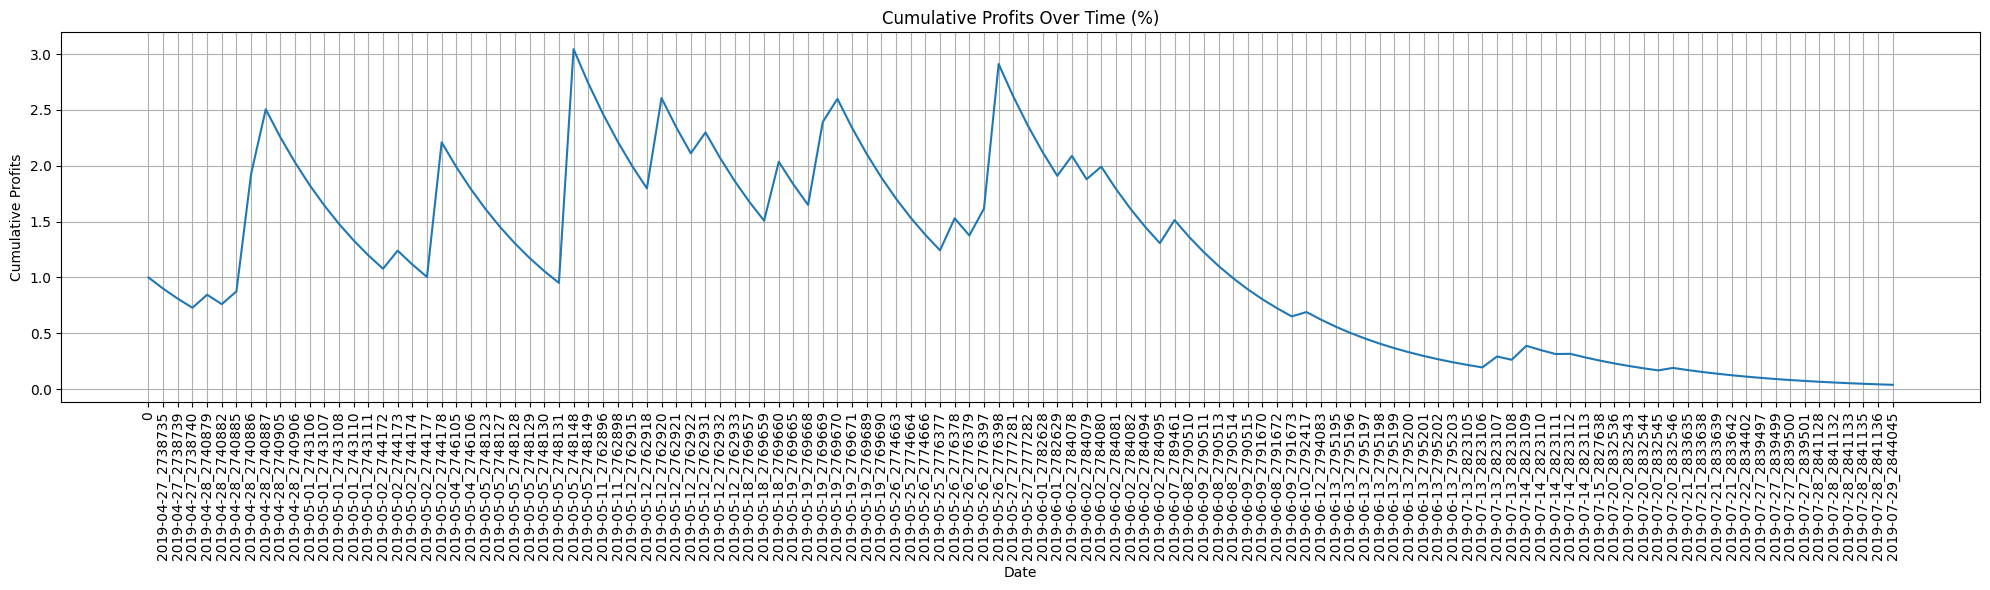

In [48]:
plot_strategy(my_df)

In [19]:
track_record.loc[:, 'year'] = track_record['datetime'].apply(lambda x: x[:4])
track_record

C:\Users\Marcos Augusto\AppData\Local\Temp\ipykernel_14456\3960167630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_record.loc[:, 'year'] = track_record['datetime'].apply(lambda x: x[:4])


,datetime,return,n_bets,count,is_valid_solution,year
0,2019-04-27,0.665453,15,3,True,2019
1,2019-04-28,1.148989,34,7,True,2019
3,2019-05-02,1.383096,25,5,True,2019
4,2019-05-04,1.045380,10,2,True,2019
5,2019-05-05,0.966362,38,8,True,2019
...,...,...,...,...,...,...
308,2022-11-03,1.413580,10,2,True,2022
309,2022-11-05,1.332791,25,5,True,2022
310,2022-11-06,1.161109,20,4,True,2022
311,2022-11-09,1.286985,25,5,True,2022


## Break by year

Year: 2019


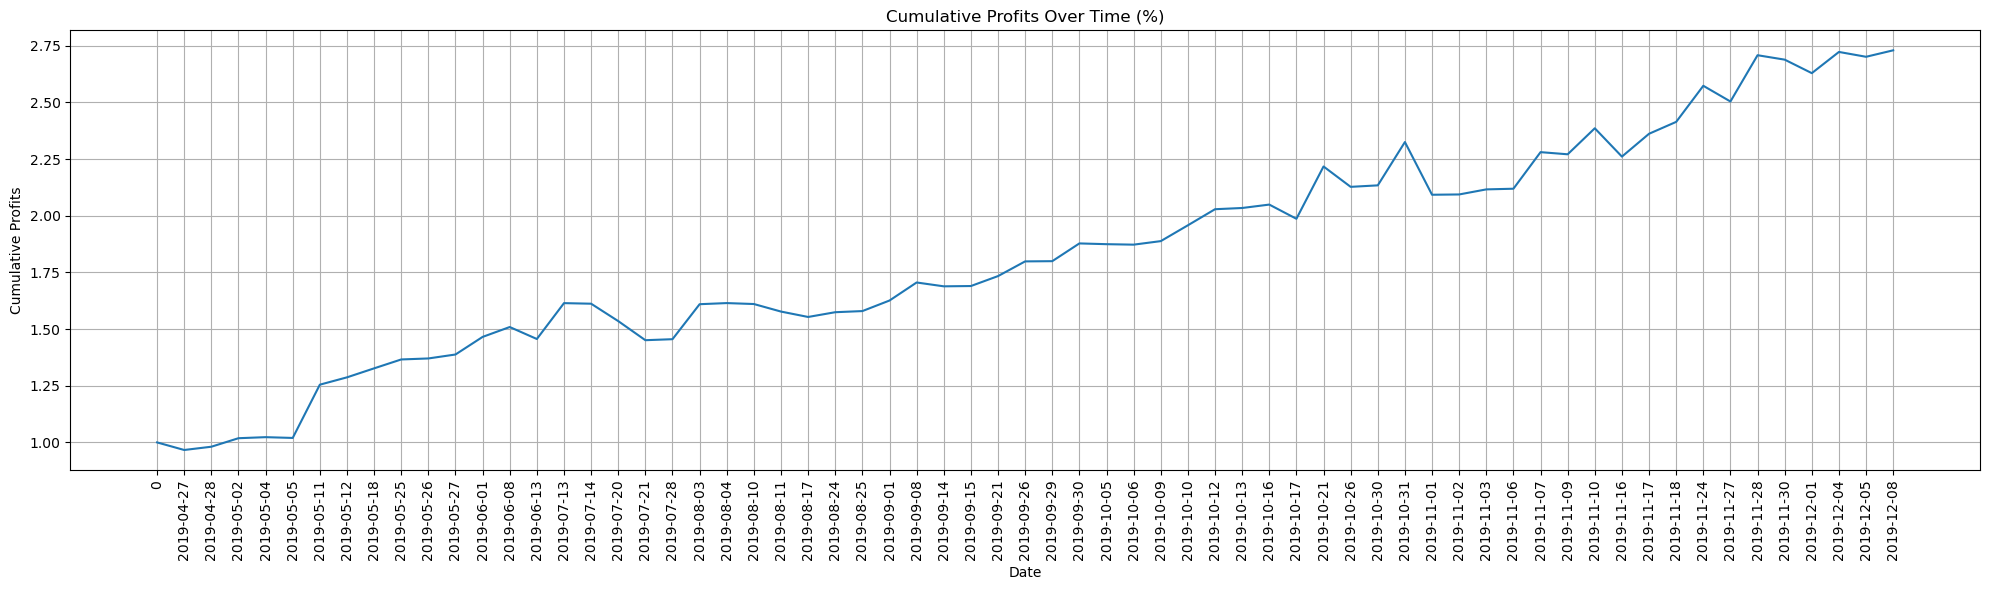

Year: 2020


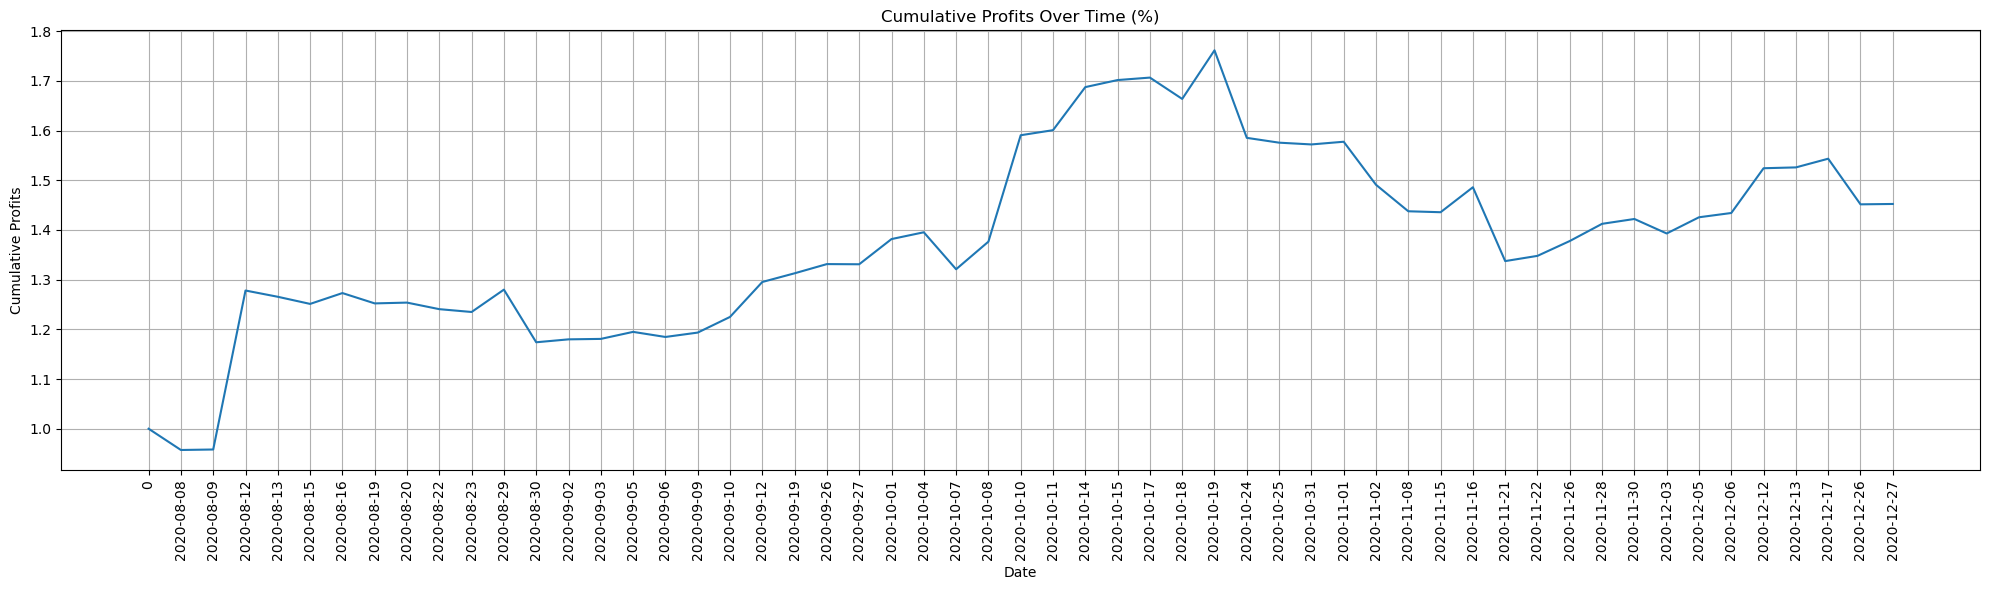

Year: 2021


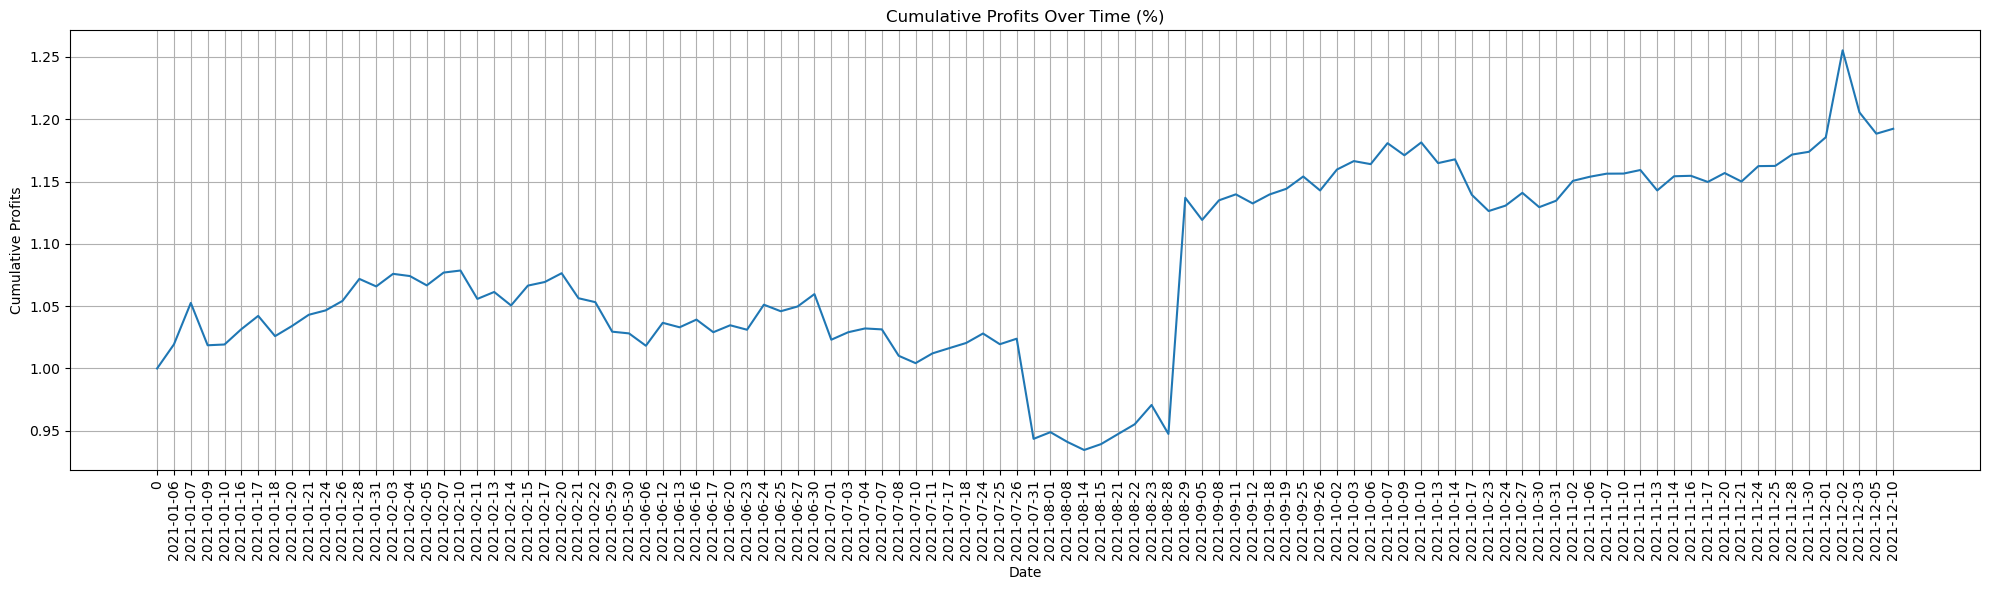

Year: 2022


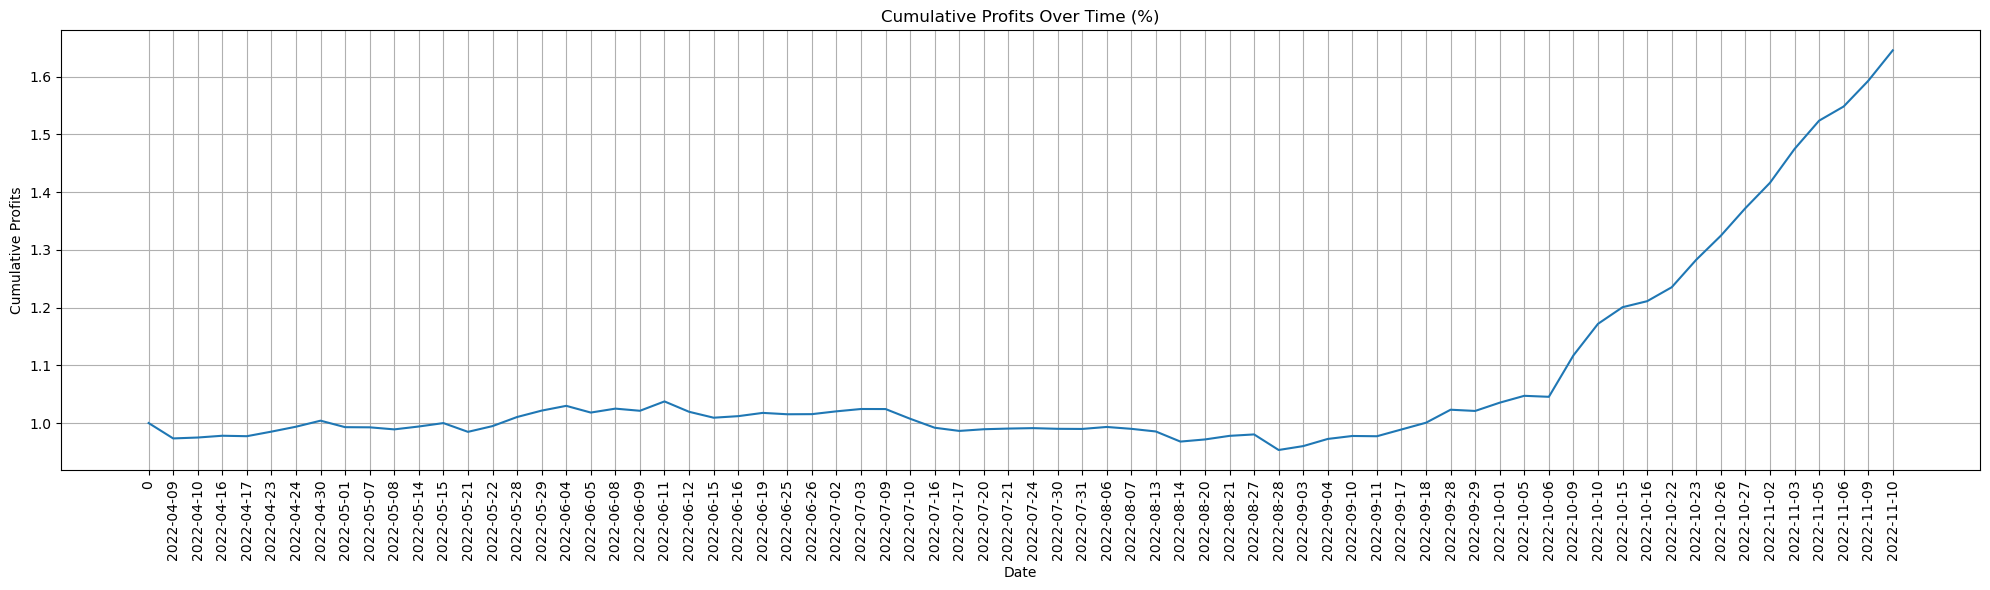

In [20]:
for year in track_record.year.unique():
    print(f"Year: {year}")
    df = track_record[track_record['year']==year]
    stake = compute_stake(df)
    my_df = build_plot_df(df, stake)
    plot_strategy(df)

## Baseline + strategy

In [106]:
df_strategy = pd.read_csv("artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231201163246/result_plot.csv").iloc[1:]
df_baseline1 = pd.read_csv("artefacts/aggregatorGameId_min_games0_do_baselineTrue_20231201231551/result_plot.csv")
df_baseline1['date'] = df_baseline1.date.apply(lambda x: x[:10])
df_baseline1 = df_baseline1.groupby('date', sort=False).last().reset_index().iloc[1:]
#df_strategy = pd.read_csv("artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231201163246/result_plot.csv")
df_baseline1

,date,return,stake
1,2019-04-27,0.000000,7.290000e-01
2,2019-04-28,0.000000,9.902719e-01
3,2019-05-01,0.000000,7.471750e-01
4,2019-05-02,5.450000,1.226803e+00
5,2019-05-04,0.000000,9.937101e-01
...,...,...,...
97,2019-12-01,0.000000,6.746560e-07
98,2019-12-02,0.000000,6.071904e-07
99,2019-12-05,1.869565,3.213215e-07
100,2019-12-04,0.000000,2.956158e-07


In [107]:
df_strategy.date = pd.to_datetime(df_strategy.date)
df_baseline1.date = pd.to_datetime(df_baseline1.date)

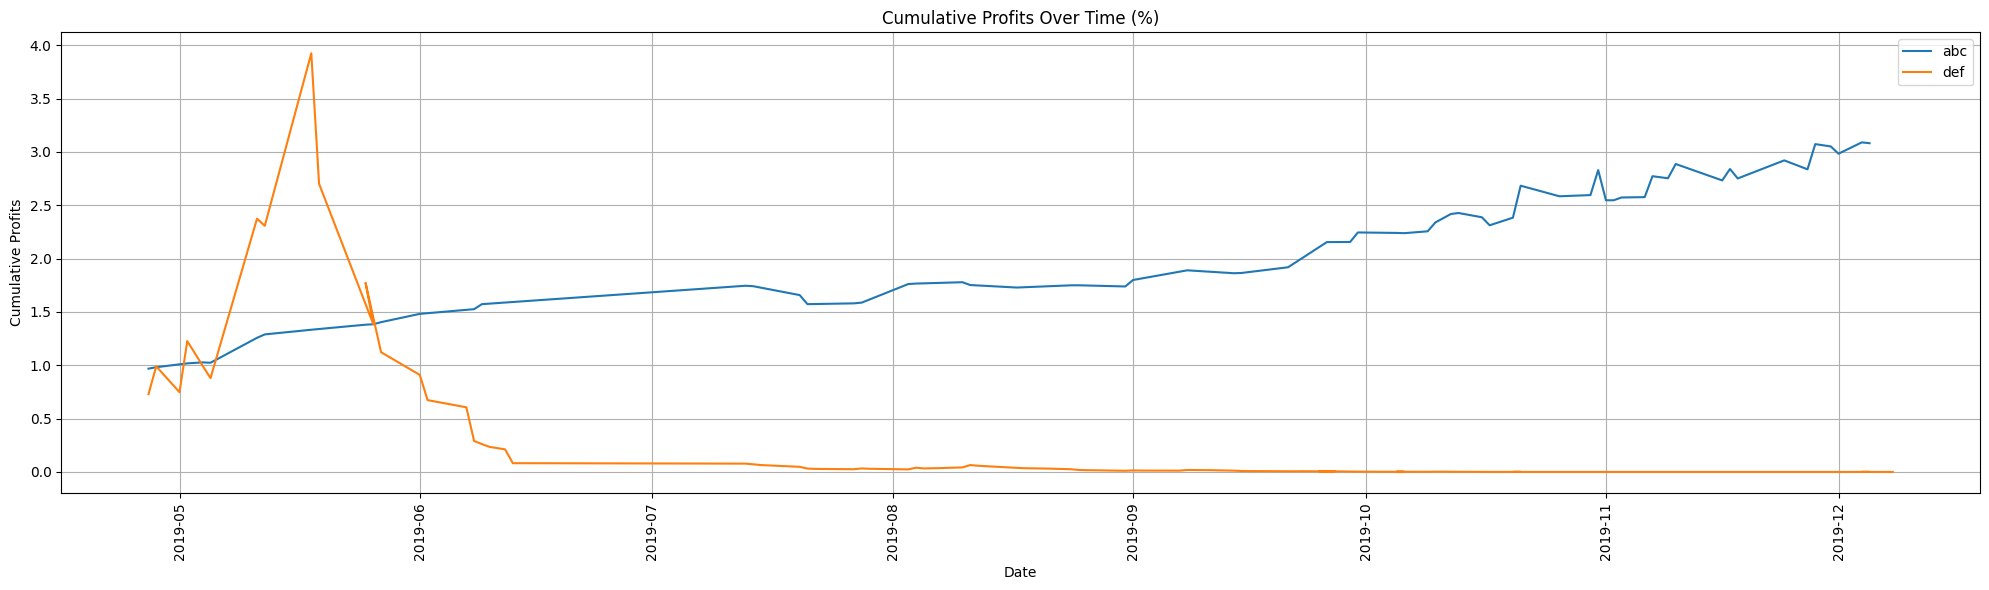

In [112]:
plt.figure(figsize=(20, 6))
plt.plot(df_strategy.date, df_strategy.stake, label='abc')
plt.plot(df_baseline1.date, df_baseline1.stake, label='def')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=90)
plt.title('Cumulative Profits Over Time (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

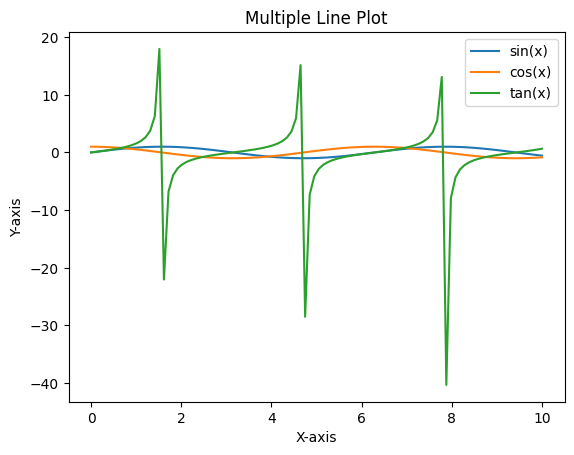

In [56]:
import numpy as np
# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Plot the lines
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='tan(x)')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Plot')
plt.legend()

# Show the plot
plt.show()


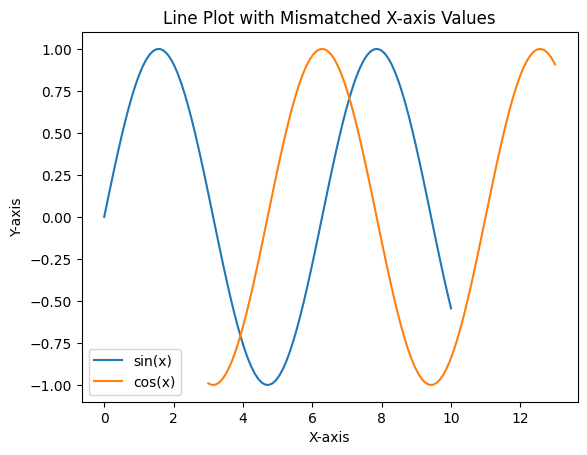

In [74]:
# Generate sample data with mismatched x-axis values
x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)

x2 = np.linspace(3, 13, 100)  # Mismatched x-axis values
y2 = np.cos(x2)

# Plot the lines with mismatched x-axis values
plt.plot(x1, y1, label='sin(x)')
plt.plot(x2, y2, label='cos(x)')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Mismatched X-axis Values')
plt.legend()

# Show the plot
plt.show()